In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline

# Series

In [5]:
s = pd.Series([x for x in range(10,15)])
print(s)
print(s[3])

0    10
1    11
2    12
3    13
4    14
dtype: int64
13


In [6]:
pd.Series([2]*5)

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [7]:
pd.Series(list('abcdef'))

0    a
1    b
2    c
3    d
4    e
5    f
dtype: object

In [9]:
# arange
np.arange(4,9) #np.array타입
pd.Series(np.arange(4,9))

0    4
1    5
2    6
3    7
4    8
dtype: int32

In [15]:
pd.Series(np.linspace(0,9,10))

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

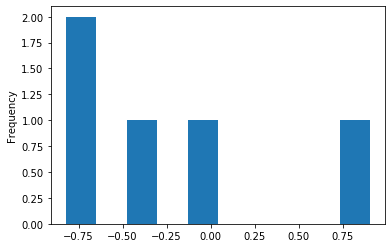

In [44]:
np.random.seed(777)
pd.Series(np.random.normal(size=5)).plot(kind='hist')

In [28]:
print(s.index)
print(s.values)

RangeIndex(start=0, stop=5, step=1)
[10 11 12 13 14]


In [29]:
print(len(s))
print(s.size)
print(s.shape)


5
5
(5,)


In [33]:
s = pd.Series(np.arange(1,11),index=list('abcdefghij'))
print(s.head())
print(s.tail())

a    1
b    2
c    3
d    4
e    5
dtype: int32
f     6
g     7
h     8
i     9
j    10
dtype: int32


In [34]:
s.take([1,5,8])

b    2
f    6
i    9
dtype: int32

In [35]:
s.loc['d']

4

In [36]:
s.iloc[5]

6

In [37]:
s.loc[['c','d']]

c    3
d    4
dtype: int32

In [38]:
s.iloc[[1,2]]

b    2
c    3
dtype: int32

In [51]:
# Slicing

s = pd.Series(np.arange(100,110), index=np.arange(10,20))
print(s[1:6])
print(s.iloc[1:6]) # 마지막 인덱스 미포함
print(s.loc[11:16]) # 마지막 인덱스 포함
print(s.iloc[[1,2,3,4,5]])

11    101
12    102
13    103
14    104
15    105
dtype: int32
11    101
12    102
13    103
14    104
15    105
dtype: int32
11    101
12    102
13    103
14    104
15    105
16    106
dtype: int32
11    101
12    102
13    103
14    104
15    105
dtype: int32


In [61]:
print(s[1:6:2])
print(s.iloc[[1,3,5]])
print(s[:5])
print(s[4:])
print(s[:5:2])
print(s[4::2])
print(s[::2])
print(s[::-1])
print(s[4::-2])

11    101
13    103
15    105
dtype: int32
11    101
13    103
15    105
dtype: int32
10    100
11    101
12    102
13    103
14    104
dtype: int32
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32
10    100
12    102
14    104
dtype: int32
14    104
16    106
18    108
dtype: int32
10    100
12    102
14    104
16    106
18    108
dtype: int32
19    109
18    108
17    107
16    106
15    105
14    104
13    103
12    102
11    101
10    100
dtype: int32
14    104
12    102
10    100
dtype: int32


In [64]:
print(s[-4:])
print(s[-4:-1])

16    106
17    107
18    108
19    109
dtype: int32
16    106
17    107
18    108
dtype: int32


In [65]:
s=pd.Series(np.arange(0,5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [66]:
print(s[1:3])

b    1
c    2
dtype: int32


In [67]:
print(s['b':'d']) #마지막 값 포함

b    1
c    2
d    3
dtype: int32


In [71]:
s1 = pd.Series([1,2], index=['a','b'])
s2 = pd.Series([4,3], index=list('ba'))
print(s1+s2)

a    4
b    6
dtype: int64


In [72]:
print(s1*2)  #elementwise

a    2
b    4
dtype: int64


In [73]:
s3 = pd.Series([5,6], index=['b','c'])#인덱스 일치하는 것끼리 연산
print(s1+s3)

a    NaN
b    7.0
c    NaN
dtype: float64


In [79]:
# boolean index
s = pd.Series(np.arange(5), index=list('abcde'))
print(s>3)
print(s[s>3])
print(s[(s>1)&(s%2==0)])

a    False
b    False
c    False
d    False
e     True
dtype: bool
e    4
dtype: int32
c    2
e    4
dtype: int32


In [84]:
np.random.seed(277)
s = pd.Series(np.random.randn(5))
print(s)
s.index = [c for c in 'abcde']
print(s)

0   -2.048283
1   -0.183444
2    0.159217
3   -0.460243
4    0.622789
dtype: float64
a   -2.048283
b   -0.183444
c    0.159217
d   -0.460243
e    0.622789
dtype: float64


In [85]:
s2 = s.reindex(['a','c', 'g'])
s2

a   -2.048283
c    0.159217
g         NaN
dtype: float64

In [87]:
# to_numeric
# to_datetime

s.values.astype(int)

array([-2,  0,  0,  0,  0])

In [93]:
s2 = s.copy()
s2.reindex(['a','f'], fill_value=0)


a   -2.048283
f    0.000000
dtype: float64

In [96]:
s3 = pd.Series(['red', 'green', 'blue'], index=[0,3,5])
s3.reindex(np.arange(7), method='bfill')

0      red
1    green
2    green
3    green
4     blue
5     blue
6      NaN
dtype: object

In [98]:
s3[0] = 'yellow'
s3
del s3[5]
s3

0    yellow
3     green
dtype: object